In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### EDA

In [3]:
data = pd.read_csv('./data/calories.csv')
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nSummary Statistic:")
print(data[numerical_columns].describe().transpose())


Summary Statistic:
              count          mean  ...          75%         max
User_ID     15000.0  1.497736e+07  ...  17449278.75  19999647.0
Age         15000.0  4.278980e+01  ...        56.00        79.0
Height      15000.0  1.744651e+02  ...       185.00       222.0
Weight      15000.0  7.496687e+01  ...        87.00       132.0
Duration    15000.0  1.553060e+01  ...        23.00        30.0
Heart_Rate  15000.0  9.551853e+01  ...       103.00       128.0
Body_Temp   15000.0  4.002545e+01  ...        40.60        41.5
Calories    15000.0  8.953953e+01  ...       138.00       314.0

[8 rows x 8 columns]


### Numerical Feature Disribution

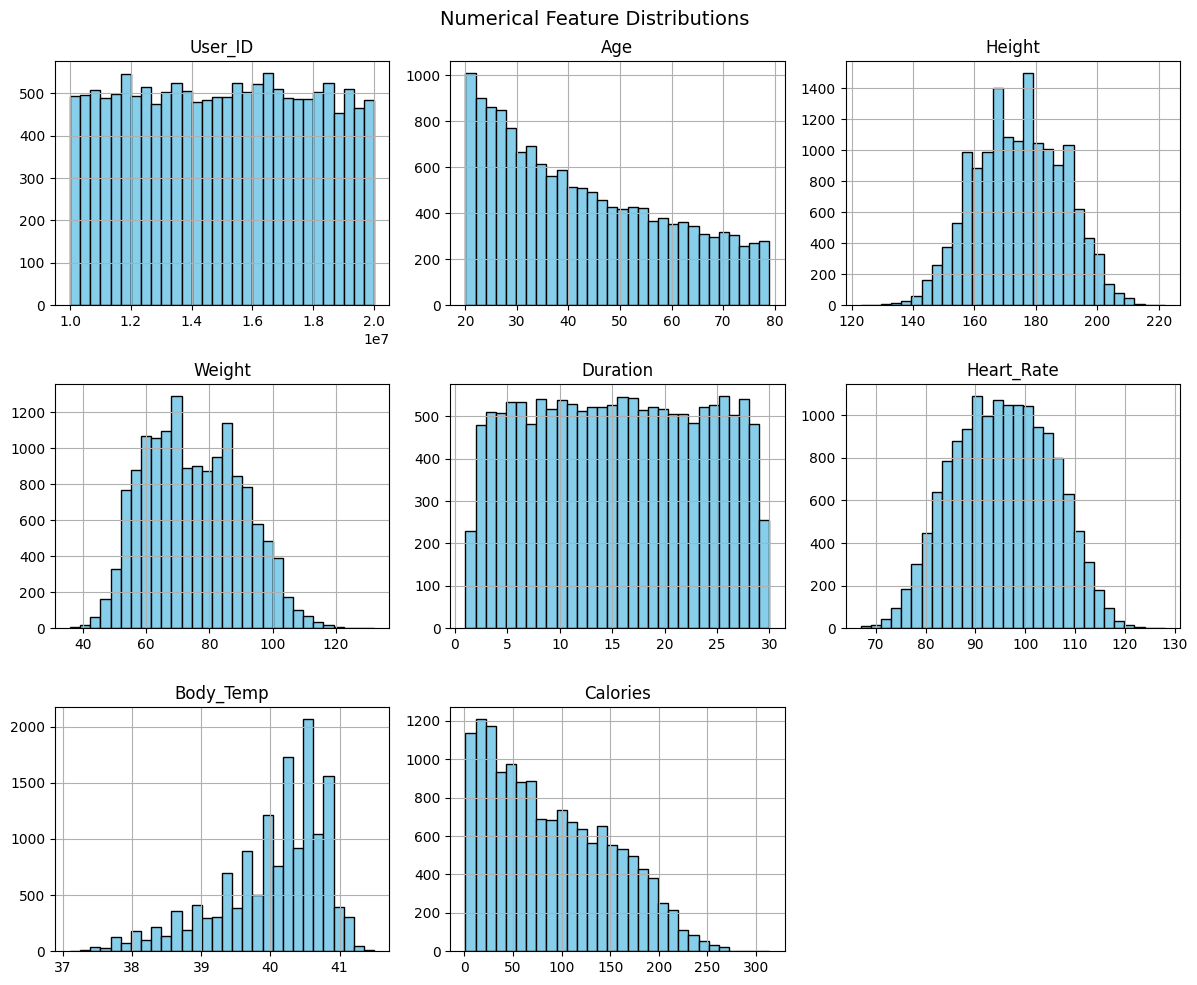

In [6]:
data[numerical_columns].hist(figsize=(12,10), color='skyblue', edgecolor='black',bins=30)
plt.suptitle('Numerical Feature Distributions', fontsize=14)
plt.tight_layout()
plt.show()

### Gender Distribution

C:\Users\NMH\AppData\Local\Temp\ipykernel_8864\2780035328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='pastel')


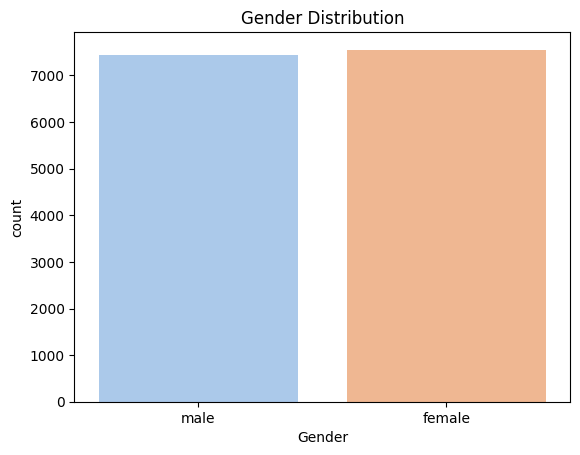

In [7]:
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

### Calories Burned by Gender

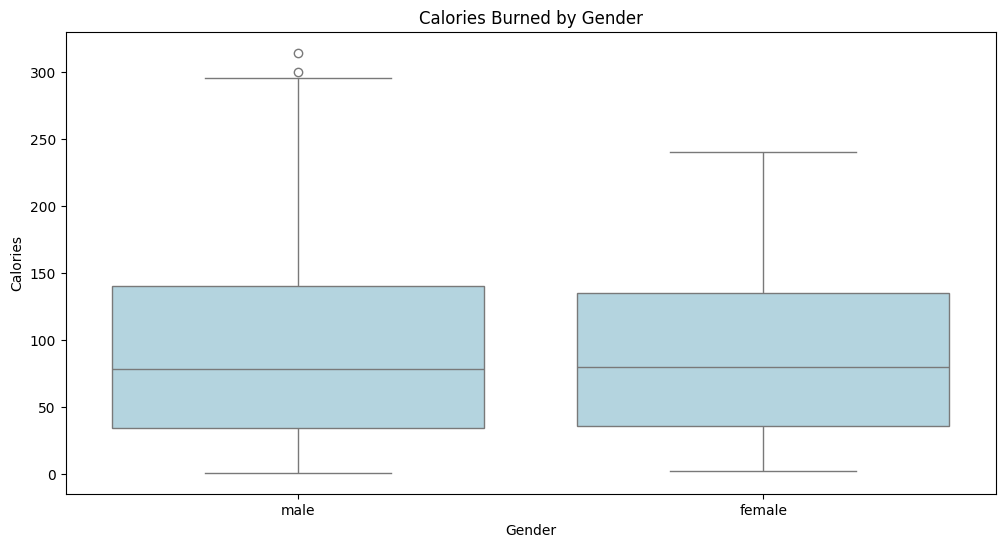

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='Gender',y='Calories',color='lightblue')
plt.title('Calories Burned by Gender')
plt.show()

### Pairplot Colored By Gender

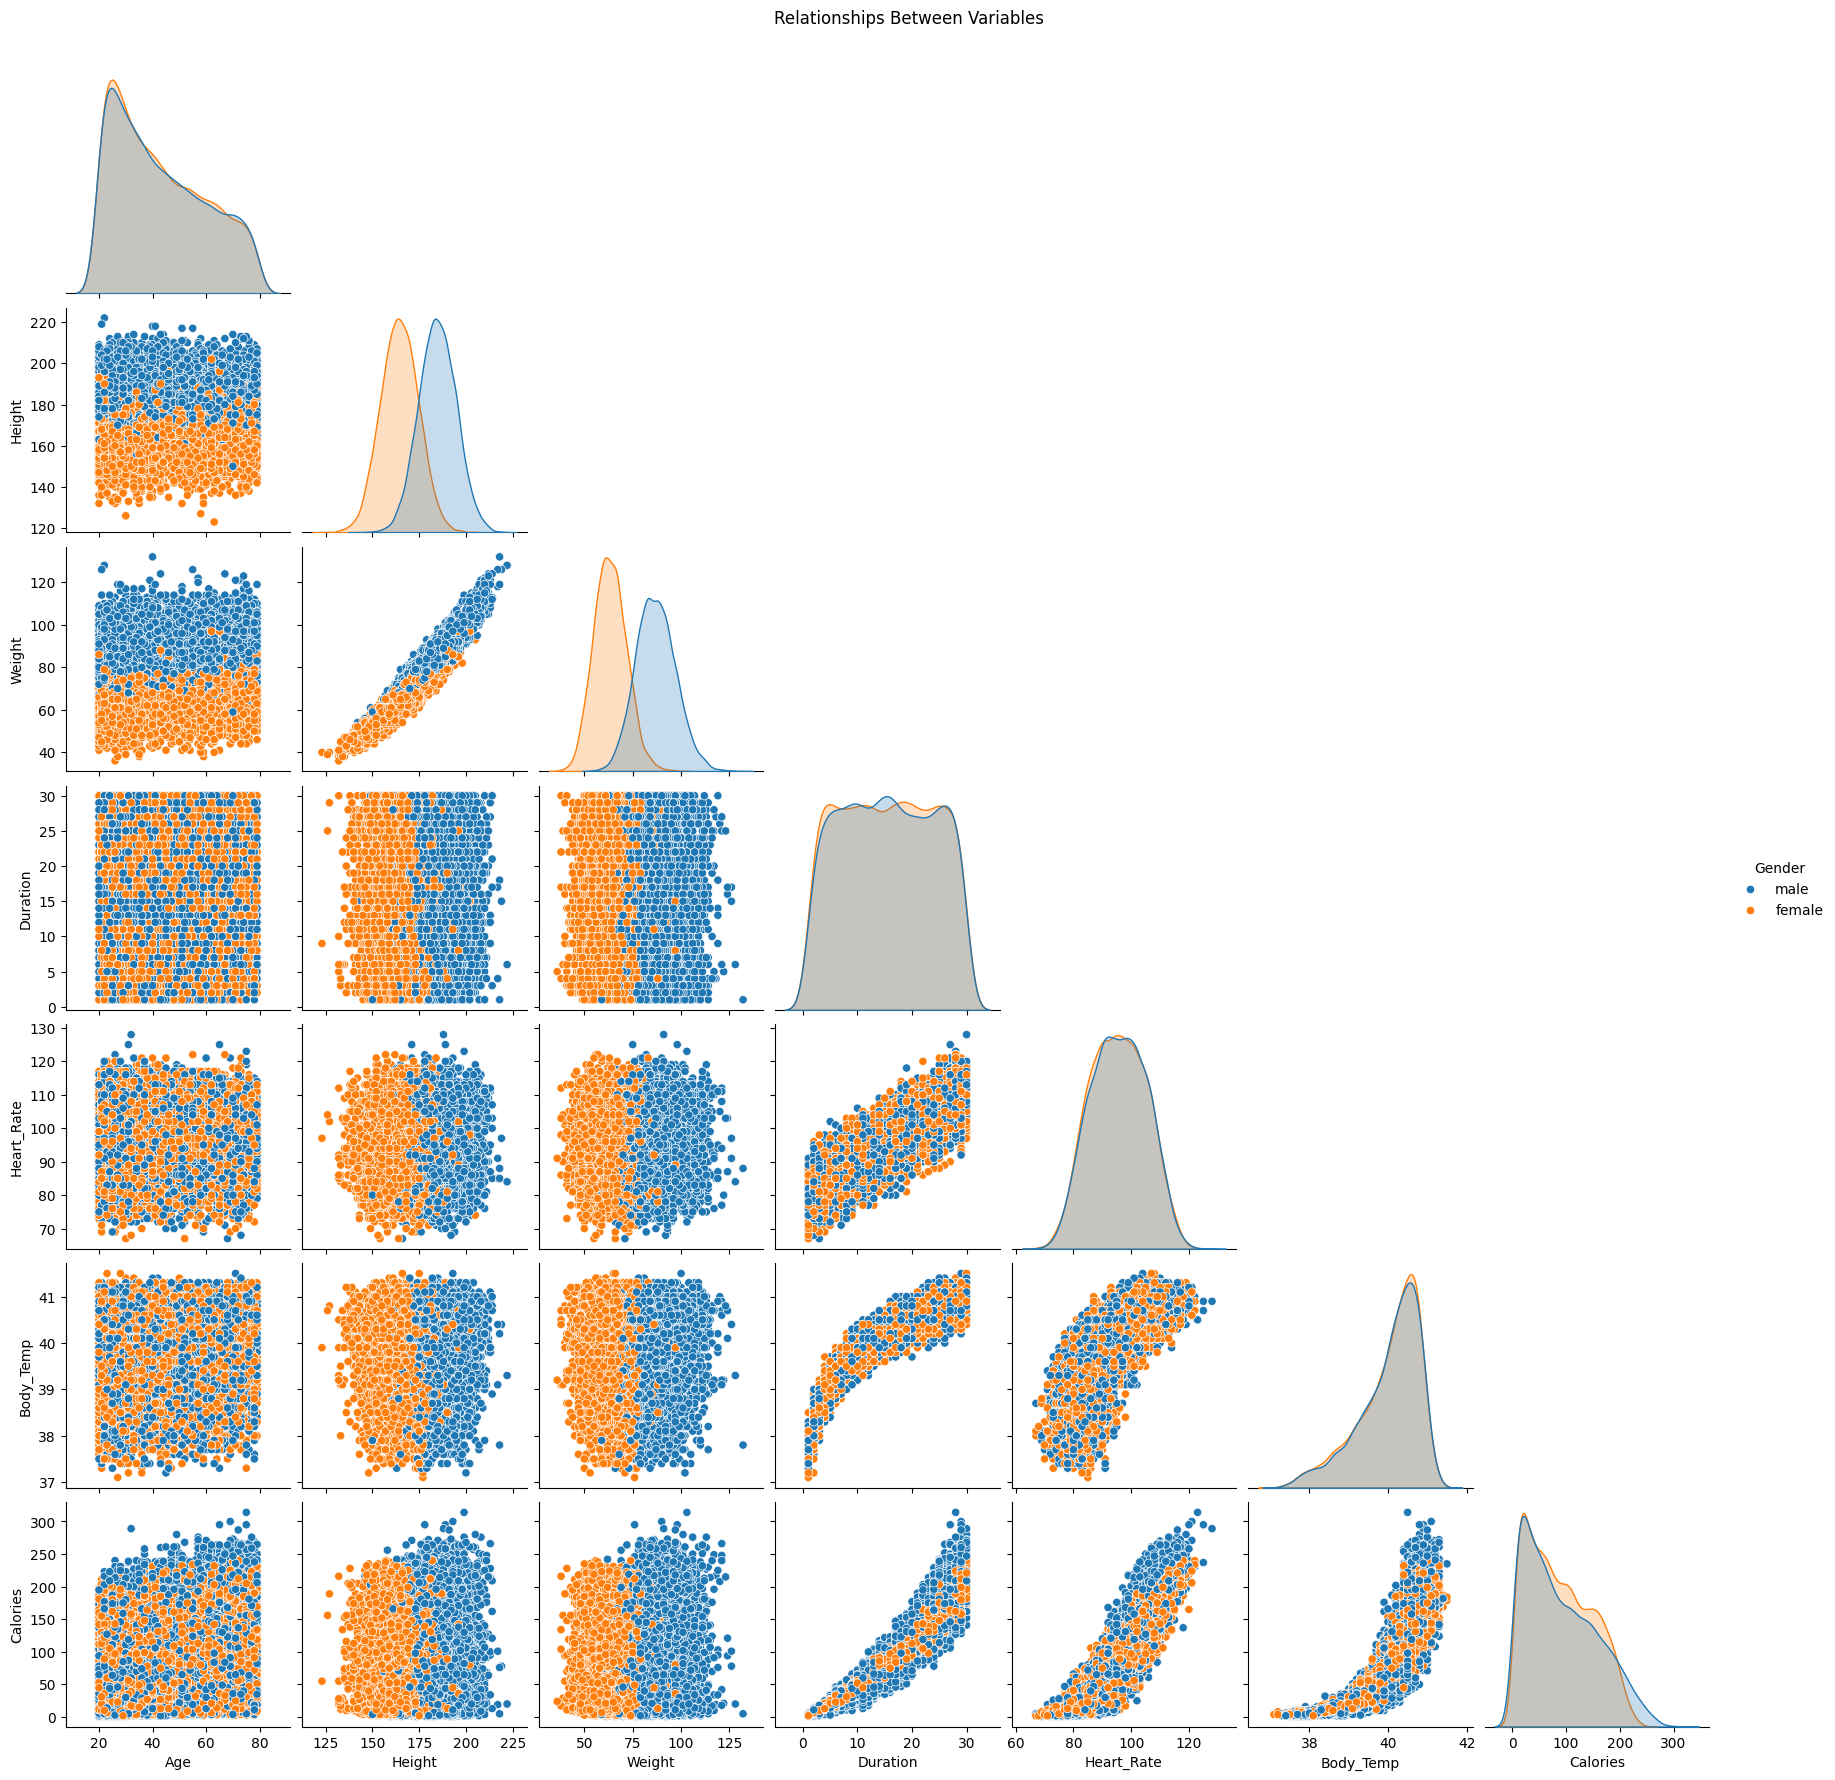

In [9]:
sns.pairplot(data=data.drop(columns=['User_ID']),hue='Gender',corner=True)
plt.suptitle('Relationships Between Variables',y=1.02)
plt.show()

### Correlation Heatmap

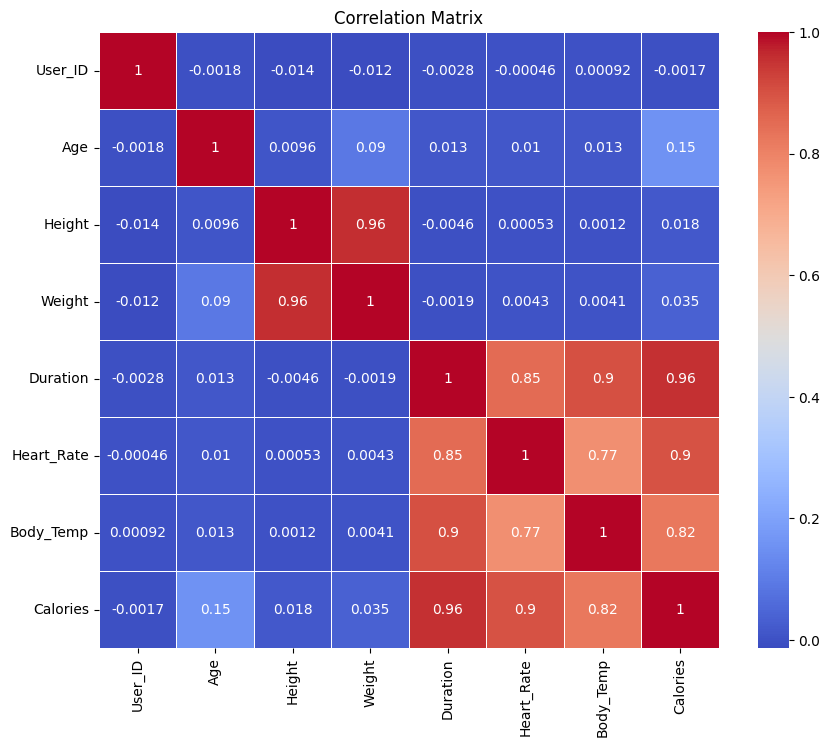

In [10]:
corr=data[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Heart Rate vs Calories (Gender Comparison)

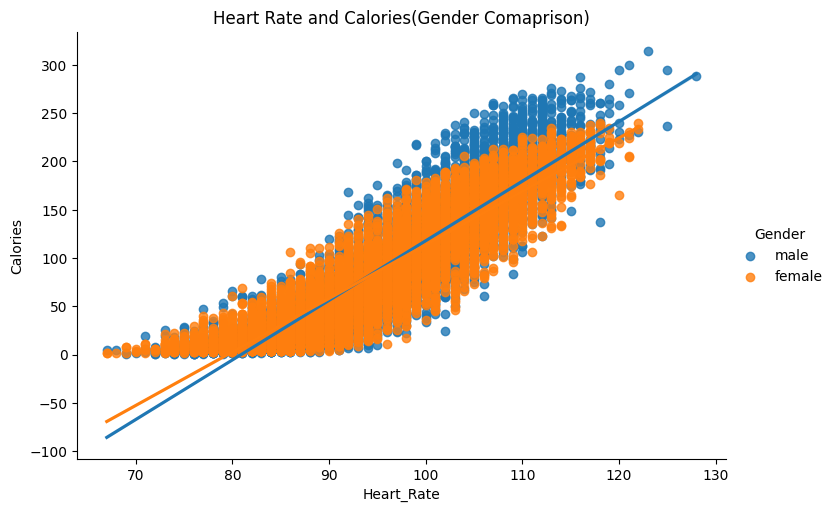

In [11]:
sns.lmplot(data=data,x='Heart_Rate', y='Calories', hue='Gender', aspect=1.5)
plt.title('Heart Rate and Calories(Gender Comaprison)')
plt.show()

### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

### Define x & y

In [13]:
x=data.drop(['User_ID', 'Age'], axis=1)
y=data['Age']

### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### MinMax Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

### Models & Metrics

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(x_train_sc, y_train)
y_pred = model.predict(x_test_sc)

R2=r2_score(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
MAE=mean_absolute_error(y_test, y_pred)
print('Linear Regression')
print(f'R2:{R2:.2f},RMSE:{RMSE:.2f},MAE:{MAE:.2f}')

Linear Regression
R2:0.41,RMSE:13.09,MAE:10.54


In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5)
model.fit(x_train_sc,y_train)
y_pred=model.predict(x_test_sc)

R2=r2_score(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
MAE=mean_absolute_error(y_test,y_pred)
print('XG-Boost Regression')
print(f'R2:{R2:.2f},RMSE:{RMSE:.2f},MAE:{MAE:.2f}')

XG-Boost Regression
R2:0.71,RMSE:9.10,MAE:7.10


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=5)
model.fit(x_train_sc,y_train)
y_pred=model.predict(x_test_sc)

R2=r2_score(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
MAE=mean_absolute_error(y_test,y_pred)
print('garident Boost Regression')
print(f'R2:{R2:.2f},RMSE:{RMSE:.2f},MAE:{MAE:.2f}')

garident Boost Regression
R2:0.71,RMSE:9.08,MAE:7.07


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
model.fit(x_train_sc,y_train)
y_pred=model.predict(x_test_sc)

R2=r2_score(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
MAE=mean_absolute_error(y_test,y_pred)
print('Polynomial Regression')
print(f'R2:{R2:.2f},RMSE:{RMSE:.2f},MAE:{MAE:.2f}')

Polynomial Regression
R2:0.98,RMSE:2.54,MAE:1.53


In [26]:
from sklearn.neural_network import MLPRegressor
model=MLPRegressor(hidden_layer_sizes=(100,50),max_iter=1000,activation='relu')
model.fit(x_train_sc,y_train)
y_pred=model.predict(x_test_sc)

R2=r2_score(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
MAE=mean_absolute_error(y_test,y_pred)
print('Mlrp Regression')
print(f'R2:{R2:.2f},RMSE:{RMSE:.2f},MAE:{MAE:.2f}')

Mlrp Regression
R2:0.96,RMSE:3.49,MAE:2.10


### Performance Visualization

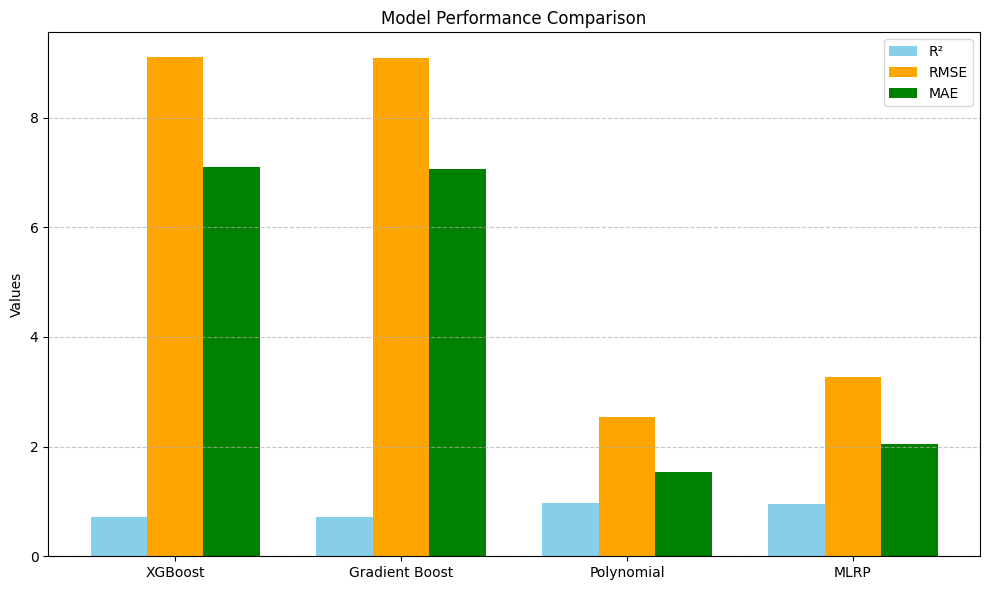

In [27]:
models=['XGBoost','Gradient Boost','Polynomial','MLRP']
r2=[0.71,0.71,0.98,0.96]
rmse=[9.10,9.08,2.54,3.27]
mae=[7.10,7.07,1.53,2.04]

x=np.arange(len(models))
width=0.25

fig,ax=plt.subplots(figsize=(10,6))
ax.bar(x-width,r2,width,label='R²',color='skyblue')
ax.bar(x,rmse,width,label='RMSE',color='orange')
ax.bar(x+width,mae,width,label='MAE',color='green')
ax.set_ylabel('Values')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y',linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()